In [4]:
import json
import pandas as pd
import numpy as np
import csv
import re

In [5]:
file_dir = "/Users/lisahanson/desktop/class/ETL"

In [6]:
f'{file_dir}wikipedia-movies.json'

'/Users/lisahanson/desktop/class/ETLwikipedia-movies.json'

In [7]:
with open(f'{file_dir}/wikipedia-movies.json', mode = 'r') as file:
    wiki_movies_raw = json.load(file)

In [8]:
len(wiki_movies_raw)

7311

In [9]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [10]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [11]:
import csv

In [12]:
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)






In [13]:
ratings = pd.read_csv(f'{file_dir}/ratings.csv')

In [14]:
kaggle_metadata.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
34657,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,253339,tt3528498,en,All American High: Revisited,"In 1984—before cell phones, the web, and reali...",...,2014-03-09,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All American High: Revisited,False,7.3,3.0
43727,False,"{'id': 224026, 'name': 'Monster High Collectio...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,413736,tt5898034,en,Monster High: Welcome to Monster High,Monsters once lived in hiding—even from each o...,...,2016-08-27,0.0,73.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Welcome to the most clever, quirky and excitin...",Monster High: Welcome to Monster High,False,5.9,19.0
19368,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,239368,tt1851900,en,Do We Really Need the Moon?,The moon is such a familiar presence in the sk...,...,2011-02-01,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Do We Really Need the Moon?,False,7.0,1.0
9876,False,NaN,5800000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,28448,tt0096409,en,Walker,William Walker and his mercenary corps enter N...,...,1987-12-04,257043.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Walker,False,6.4,16.0
2688,False,NaN,45000000,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,9944,tt0107798,en,The Pelican Brief,Two Supreme Court Justices have been assassina...,...,1993-12-16,195268056.0,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Two Supreme Court Justices have been assassina...,The Pelican Brief,False,6.3,377.0


In [15]:
ratings.sample(5)
#can also do ratings.sample(n=5)

,userId,movieId,rating,timestamp
10492898,108371,27815,5.0,1440694415
6134806,63210,1240,4.0,1366323278
4649448,47738,2012,3.0,986342169
19670516,204332,5876,4.5,1081121532
25158229,261773,29,2.0,1365710185


In [16]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.sample(5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
1138,https://en.wikipedia.org/wiki/Silent_Fall,1994.0,https://www.imdb.com/title/tt0111187/,Silent Fall,Bruce Beresford,James G. Robinson,NaN,NaN,NaN,"[Richard Dreyfuss, Linda Hamilton, John Lithgo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4339,https://en.wikipedia.org/wiki/No_Limit_(2006_f...,2006.0,https://www.imdb.com/title/tt0478217,No Limit: A Search for the American Dream on t...,"[Brian O'Hare, Timothy Rhys]",Susan Genard,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1729,https://en.wikipedia.org/wiki/Memory_Run,1996.0,https://www.imdb.com/title/tt0117017/,Memory Run,Allan A. Goldstein,NaN,NaN,NaN,NaN,"[Karen Duffy, Matt McCoy]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3252,https://en.wikipedia.org/wiki/Like_Mike,2002.0,https://www.imdb.com/title/tt0308506/,Like Mike,John Schultz,"[Barry Josephson, Peter Heller]","[Michael Elliot, Jordan Moffet]",Michael Elliot,NaN,"[Lil' Bow Wow, Morris Chestnut, Jonathan Lipni...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,https://en.wikipedia.org/wiki/8_Seconds,1994.0,https://www.imdb.com/title/tt0109021/,8 Seconds,John G. Avildsen,"[Clyde LeVin, Danny DeVito, Tony Mark, Jeffery...",NaN,NaN,NaN,"[Luke Perry, Stephen Baldwin, James Rebhorn, C...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [18]:
#list comprehension is used as a compact way to apply a function to every element in a list
#Use List Comprehensions to Filter Data 
# expression for element in source_list
# expression for element in source_list if filter_expression

#filter expression for movies with a director and an IMDb link: 
#if ('Director' in movie or 'Directed by' in movie) and 'imdb_link' in movie



In [19]:
wiki_movies = [movie for movie in wiki_movies_raw
              if ('Director' in movie or 'Directed by' in movie)
               and 'imdb_link' in movie]
len(wiki_movies)

7080

In [20]:
wiki_movies_new = pd.DataFrame(wiki_movies)

In [21]:
len(wiki_movies_new.columns.tolist())

78

In [22]:
wiki_movies_new.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Camera setup'

In [23]:
# second_iteration

wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)


7076

In [24]:
# Anatomy of a function
# 1. Name
# 2. Parameters
# 3. Code Block
#  can include variables that are created outside the function and can initialize new variables 
#  inside the function
# scope is the heirarchy of variables 
# 4. Return value

In [25]:
#lambda arguments: expression
#takes in an argument and returns an expression 

lambda x: x * x
square = lambda x: x * x
square(5)


25

In [26]:
#making a copy to make nondestructive edits
#using constructor dict()

def clean_movie(movie):
    movie_copy = dict(movie)
    

In [27]:
#create a new local variable called movie and assign it the new copy of the parameter
def clean_movie(movie):
    movie = dict(movie)
    return movie

In [28]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
7060,https://en.wikipedia.org/wiki/The_Insult_(film),2018.0,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7293,https://en.wikipedia.org/wiki/Capernaum_(film),2018.0,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [30]:
#skill drill
sorted(wiki_movies_df.columns.tolist())

['Actor control',
 'Adaptation by',
 'Alias',
 'Alma mater',
 'Also known as',
 'Animation by',
 'Arabic',
 'Area',
 'Area served',
 'Artist(s)',
 'Attraction type',
 'Audio format',
 'Author',
 'Based on',
 'Biographical data',
 'Bopomofo',
 'Born',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Characters',
 'Children',
 'Chinese',
 'Cinematography',
 'Closing date',
 'Color process',
 'Comics',
 'Composer(s)',
 'Coordinates',
 'Country',
 'Country of origin',
 'Cover artist',
 'Created by',
 'Date premiered',
 'Designer(s)',
 'Developed by',
 'Developer(s)',
 'Dewey Decimal',
 'Died',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Divisions',
 'Duration',
 'Edited by',
 'Editor(s)',
 'Ending theme',
 'Engine',
 'Engine(s)',
 'Executive producer(s)',
 'Family',
 'Fate',
 'Film(s)',
 'Followed by',
 'Format(s)',
 'Formerly',
 'Founded',
 'Founder',
 'Founders',
 'French',
 'Full name',
 'Gender',
 'Genre',
 'Genre(s)',
 'Genres',
 'Gwoyeu Romatzyh',
 'Ha

In [31]:
#Handling alternate titles in different languages
#1Make an empty dict to hold all of the alternate titles

def clean_movie(movie):
    movie = dict(movie)
    alt_titles = {}
#2Loop through a list of all alternative title keys
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
#2a: Check if the current key exists in the movie object
        if key in movie: 
#2b: If so, remove the key-value pair and add to the alternative titles dictionary
            alt_titles[key] = movie[key]
            movie.pop(key)
#3 After looping through every key, add the alternative titles dict to the movie object
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
        
    return movie


In [32]:
#list comprehension to make a list of clean movies
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [33]:
wiki_movies_df = pd.DataFrame(clean_movies)
len(sorted(wiki_movies_df.columns.tolist()))

56

In [34]:
#Consolidate columns with the same data in one column
#use pop() method to change the name of a dictionary key
#to check if the key exists in a given movie record, make a small function
#inside a function
#Functions defined within another function live within the scope of the first
#equation. This means that the inner function can only be called inside the outer function

def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
#---using pop() method to change the name of a dictionary key
#---module provides code block and assumes review of data to identify identitical values with
#different keys
    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie


In [35]:
# rerun list comprehension to clean wiki_movies and recreate wiki_movies_df

clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())




['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [36]:
#Cleaning columns above - complete; next step, clean rows

In [37]:
#using the IMDB ID from wikipedia movies file to merge with Kaggle data
#to extract the IMDb ID from the IMDb link, use regex "(tt\d{7})" 
#tt\d{7} is the regular expression for a group of characters that start with "tt" and has seven digits
#regex aka regular expressions are strings of characters that define a search pattern
#tell Python to treat regular expression characters as a raw string of text - use "r" before the quote


wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))




7076


In [38]:
# drop_duplicates() method used to drop duplicates
#use sub_set ID to specify only IMDb ID 
#inplace = True to perform only on selected data frame
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))

7033


In [39]:
wiki_movies_df.head(5)

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [40]:
#Remove Mostly Null columns
#to count null values for each column use list comprehension

[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

#You can also use a for loop and a print statement 

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

In [41]:
#Make a list of columns that have less than 90% null values and use those to trim down the dataset

[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() \
 < len(wiki_movies_df) * 0.9]




['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [42]:
#selecting columns to keep from the DataFrame

wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() \
 < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.head(5)


,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


In [43]:
#parsing to convert data types


In [44]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [45]:
#box office data drop missing values for better inspection

box_office = wiki_movies_df['Box office'].dropna()
box_office
#5,500 moviews out of 7000 have box office amounts; 25 percent do not have box office amounts, which means the bottom quartile of movies has no box office data, but for
#every missing box office data, there are a little more than three movies that do have the data

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [46]:
len(wiki_movies_df)

7033

In [47]:
#regular expressions only work on strings, so all box office data should be 
# entered a string 
# use map method to see values that are not strings
def is_not_a_string(x):
    return type(x) != str
box_office[box_office.map(is_not_a_string)]


34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [48]:
#Instead of creating a new function with a block of code and the def keyword, we
#can create an anoynmous lambda function right inside the map() call

#lambda function is not a string()

lambda x: type(x) != str


<function __main__.<lambda>(x)>

In [49]:
#update the map() call to use the lambda function directly instead of using
#is not a string()

box_office[box_office.map(lambda x: type(x) !=str)]



34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [50]:
# Use join() string method that concatenates list items into one string
# Use a simple space as a joining character and apply the join() function

box_office = box_office.apply(lambda x: ''.join(x) if type(x) == list else x) 
box_office



0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [51]:
#PARSE THE BOX OFFICE DATA 8.3.10
#Two forms of box offic data:
# 1). $123.4 million
# 2). $123,456,789
# Build a regular expression for each form, and see what forms are left over

# 1). $123.4 million
# pattern to include six elements in the following order

# 1). A dollar sign
#   \$
# 2). An arbitraty (but non-zero) number of digits
#   \d+
# 3). An optional decimal point
#    \.? 
# 4). An arbitrary (but possibly zero) number of more digits
# \d*
# 5). A space(maybe more than one)
# \s*
# 6). The word "million" or "billion"
# [mb]illion

form_one = r'\$\d+\.?\d*\s*[mb]illion'

# We will use contains() method to ignore case
# We will use str.contains() method on box office
# flags argument used to ignore upper or lowercase
# sum() to count up the total number

box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()


3901

In [52]:
# Second Form
# $123,456,789

# 1 A dollar sign
# \$

# A group of one to three digits
# \d{1,3}

# At least one group starting wtih a comma and followed by exactly three digits
# (?:,\d{3})+

form_two = r'\$\d{1,3}(?:,\d{3})+'

box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()



1550

In [53]:
# Create Boolean Series to see if any are matched by both

matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)


In [54]:
# this will throw an error!
#box_office[(not matches_form_one) and (not matches_form_two)]

In [55]:
#instead of not, and, or use
#~ for not, & for and, | for or

In [56]:
box_office[~matches_form_one & ~matches_form_two]

79                         $335.000
110              $4.35-4.37 million
600                      $5000 (US)
957                        $ 50,004
1070                     35,254,617
1446                   $ 11,829,959
1480                     £3 million
1611                       $520.000
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2263          $ 1,223,034(domestic)
2347                       $282.175
2665    926,423 admissions (France)
2823                       $414.000
2924                       $621.000
3088         $32[2]–33.1 million[1]
3631                            TBA
3859             $38.9–40.3 million
3879       CN¥3.650 million (China)
4116                     £7,385,434
4123                       $161.000
4261             $20.7–23.9 million
4306                         $20-30
4492                   $47.7 millon
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       4

In [57]:
#Fix pattern matches

# 1. Some values have spaces in between the dollar sign and the number
# add \s* after dollar signs
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
#form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

# 2. Some values use a period as a thousands separator
# \.
#form_two = r'\$\s*\d{1,3}(?:[,\.\d{3})+'
# to prevent returns of 1.234 billion add a negative lookahead group

form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

# 3. Some values are given as a range
#search for any string that begins with a dollar sign and ends with a hyphen,
#and replace it with a dollar sign using the replace() method
# the first argument in replace() is the substring that will be replaced and the second
# argument is the string to replace it with. 
# We can use regular expressins in the first argument by sending the paramter to true

# includes em dashes and en dashes
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

#box_office = box_office.str.replace(r'\$.*[---](?![a-z])', '$', regex=True)

# 4. "Million" is sometimes misspelled as "millon"
#make the second i optional in the match string
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'



In [58]:
# Extract and convert the box office values 
# Use str.extract() method to extract expressions created above to extract only the parts of the strings that match

box_office.str.extract(f'({form_one}|{form_two})')


,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [59]:
#Create a function to turn extracted values into a numeric value
# use re python module
# use re.match(pattern,string) to see if the string matches a pattern

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
    
        # remove dollar sign and " million"
        
        # convert to float and multiply by a million
        
        # return value
        
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on'), s, flags=re.IGNORECASE):
        
    
        # remove dollar sign and "billion"
        
        # convert to float and multiply by a billion
        
        # return value
        
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

    
        # remove dollar sign and commas
        
        # convert to float
        
        # return value
        
    # otherwise, return NaN
    else:
        return np.nan
    
    
    



IndentationError: expected an indented block (3316144345.py, line 20)

In [60]:
# next use re.sub(pattern, replacement_string, string) to remove dollar signs, spaces, commas, and letters



def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
    
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','',s)
        
        # convert to float and multiply by a million
        
        # return value
        
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on'), s, flags=re.IGNORECASE):
        
    
        # remove dollar sign and "billion"
         s = re.sub('\$|\s|[a-zA-Z]','',s)
        
        # convert to float and multiply by a billion
        
        # return value
        
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

    
        # remove dollar sign and commas
         s = re.sub('\$|\s|[a-zA-Z]','',s)
        
        # convert to float
        
        # return value
        
    # otherwise, return NaN
    else:
        return np.nan
    

SyntaxError: invalid syntax (830396473.py, line 21)

In [61]:
#Lastly, convert all strings to floats, multiply by the right amount, and return the value 
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan
        
        

In [62]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['box_office']





0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [63]:
# The box office column is no longer needed, so we'll drop it

wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [64]:
# 8.3.1.. PARSE THE BUDGET DATA

In [65]:
budget = wiki_movies_df['Budget'].dropna()

In [66]:
#convert any lists to strings

budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)



In [67]:
#Remove any values between a dollar sign and a hyphen (for budgets in a given range)

budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)


In [68]:
#Use the same pattern matches created to parse box office data and apply them without modifications to the budget data

matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]




136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [69]:
# remove citation references in brackets 

budget = budget.str.replace(r'\[\d+\]\s*','')

budget[~matches_form_one & ~matches_form_two]

/var/folders/q7/rbbzjjyx34sc5gbpg080yr800000gn/T/ipykernel_1052/3975421442.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  budget = budget.str.replace(r'\[\d+\]\s*','')


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [70]:
#Parse the budget values

wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

 



In [71]:
#Drop the original Budget column
wiki_movies_df.drop('Budget', axis=1, inplace=True)


In [72]:
#Parse the Release Date

#make a variable that holds the non-null values of Release date in a dataframe
# converting lists to strings

release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)


In [73]:
# Parsing the Release Date

# 1. Full Month name, one-to-two digit day, four-digit year (i.e. January 1, 2000)
# use "?:" Non capturing Group 
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'

# 2. Four-digit year, two-digit month, two-digit day, with any separator
# (i.e. 2000-01-01)
date_form_two = r'\d{4}.[01]\d.[0123]\d'


#3 Full month name, four-digit year (i.e. January 2000)
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'

#4 Four digit year
date_form_four = r'\d{4}'


In [74]:
# Extract the dates

release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)



,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [75]:
# Instead of creating a new function, use the built-in to_datetime() Pandas function

# Since there are different date formats, set the infer_datetime_format option to True

wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)     


In [76]:
# Parse Running Time
# Make a variable that holds the non-null values of running time in the DataFrame, converting lists to strings

running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
#running_time[:20]
len(running_time)


6894

In [77]:
#How many running times format "100 minutes"

running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()






6528

In [78]:
running_time2 = running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

running_time2


9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [79]:
# only searching up the letter m accepts other abbreviations of minutes

running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()



6877

In [80]:
#The remaining 17
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]


668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [81]:
# Match all of the hour + minute patterns with one regular expression pattern: 

# 1. Start with one or more digits
# \d+

# 2. Have an optional space after the digit before the letter "h"
#\s*

# 3. Capture all possible abbreviations of "hour(s)" To do this, we'll make every letter in "hours"
# optional except the "h"
# ho?u?r?s?

# 4. Have an optional space after the "hours" marker
#\s*

# 5. Have an optional number of digits for movies 
#\d*

running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')




In [82]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [83]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)


In [84]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [85]:
#8.3.12 Clean the Kaggle Data

In [86]:
#kaggle data came in a csv
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [ ]:
#object datatype is usually for strings
#Convert metadata release_date, ID, video, popularity, adult, budget

In [93]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [94]:
# remove the bad data
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#drop bad data # remove adult films

kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')



In [96]:
# video column

kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [97]:
# to convert to boolean

kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [98]:
# assign it back to video

kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'


In [99]:
# for the numeric columns, use to_numeric() Pandas method

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')





In [103]:
# convert release date using to_datetime() Pandas method

kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [109]:
#Reasonability checks on Ratings Data

ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


/var/folders/q7/rbbzjjyx34sc5gbpg080yr800000gn/T/ipykernel_1052/402938120.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings.info(null_counts=True)


In [ ]:
#Unix time standard stores points of time as integers 
#specify in to_datetime() that the origin is 'unix' and the time unit in seconds

In [117]:
pd.to_datetime(ratings['timestamp'], unit='s').head(10)

0   2015-03-09 22:52:09
1   2015-03-09 23:07:15
2   2015-03-09 22:52:03
3   2015-03-09 22:52:26
4   2015-03-09 22:52:36
5   2015-03-09 23:02:28
6   2015-03-09 22:48:20
7   2015-03-09 22:53:13
8   2015-03-09 22:53:21
9   2015-03-09 23:03:48
Name: timestamp, dtype: datetime64[ns]

In [118]:
#assign to the timestamp column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit= 's')


In [ ]:
#look at statistics for glaring errors
#use histogram and use describe()
# histogram tells how often a datapoint shows up in data


count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

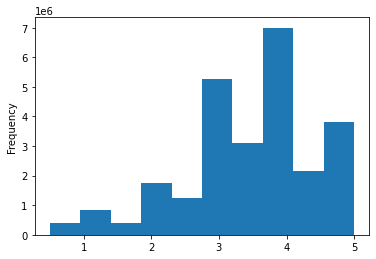

In [119]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind = 'hist')
ratings['rating'].describe()